In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from tqdm import tqdm
import seaborn as sns
sns.set_style("whitegrid")
from scipy.stats import norm

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import mannwhitneyu
from sklearn.metrics import average_precision_score # PR-AUC
from sklearn.ensemble import BaggingClassifier
from scipy.stats import ks_2samp
import random
import sklearn

!pip -q install lime
!pip -q install shap
import lime
import lime.lime_tabular
import shap

from sklearn.inspection import permutation_importance

     |████████████████████████████████| 275 kB 6.6 MB/s 
     |████████████████████████████████| 569 kB 6.2 MB/s 


In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/data/features_asd_control_for_neural_network_course_desikan.csv'
df = pd.read_csv(path)

In [5]:
df.shape

(3020, 674)

In [6]:
df.columns

Index(['Unnamed: 0', 'coef_35_45_bankssts-rh',
       'coef_35_45_caudalanteriorcingulate-rh',
       'coef_35_45_caudalmiddlefrontal-rh', 'coef_35_45_cuneus-rh',
       'coef_35_45_entorhinal-rh', 'coef_35_45_frontalpole-rh',
       'coef_35_45_fusiform-rh', 'coef_35_45_inferiorparietal-rh',
       'coef_35_45_inferiortemporal-rh',
       ...
       'delta_2_40_rostralmiddlefrontal-lh', 'delta_2_40_superiorfrontal-lh',
       'delta_2_40_superiorparietal-lh', 'delta_2_40_superiortemporal-lh',
       'delta_2_40_supramarginal-lh', 'delta_2_40_temporalpole-lh',
       'delta_2_40_transversetemporal-lh', 'Subject', 'Age', 'IQ'],
      dtype='object', length=674)

In [7]:
df.Subject[1637]

'R0001'

In [8]:
targets = []
for i in range(len(df['Subject'])):
  if df['Subject'].iloc[i][0]=='K':
    targets.append(0)
  elif df['Subject'].iloc[i][0]=='R':
    targets.append(1)

In [9]:
df['Group'] = targets

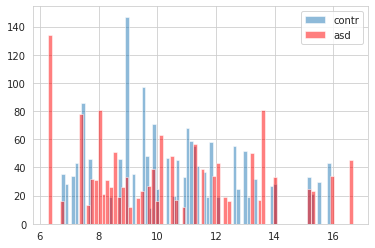

In [10]:
plt.hist(df[:1637]['Age'], alpha=0.5, label='contr', bins=80)
plt.hist(df[1637:]['Age'], color='red', alpha=0.5, label='asd', bins=80)
plt.legend()

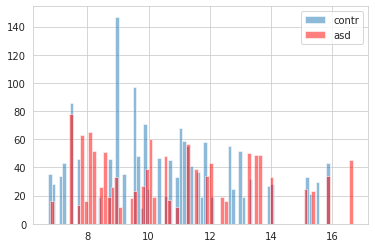

In [11]:
df = df[df['Age']>6.5]
plt.hist(df[:1637]['Age'], alpha=0.5, label='contr', bins=80)
plt.hist(df[1637:]['Age'], color='red', alpha=0.5, label='asd', bins=80)
plt.legend()

In [12]:
df[(df['Age']>8.5)&(df['Age']<10)]['Subject'].unique()

array(['K0015', 'K0017', 'K0018', 'K0025', 'K0030', 'K0033', 'K0045',
       'K0059', 'K0061', 'K0062', 'K0066', 'K0067', 'K0070', 'K0075',
       'R0005', 'R0007', 'R0010', 'R0034', 'R0038', 'R0040', 'R0050',
       'R0060', 'R0064', 'R0073'], dtype=object)

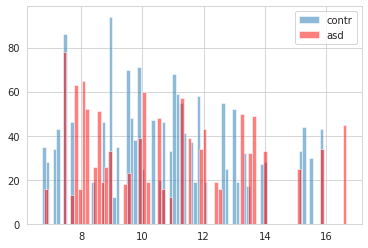

In [13]:
ttt = df.drop(df[df['Subject']=='K0075'].index)
ttt = ttt.drop(ttt[ttt['Subject']=='K0033'].index)
plt.hist(ttt[:1637]['Age'], alpha=0.5, label='contr', bins=80)
plt.hist(ttt[1637:]['Age'], color='red', alpha=0.5, label='asd', bins=80)
plt.legend()

In [14]:
ttt['Subject'].iloc[1557]

'R0001'

In [15]:
mannwhitneyu(ttt[:1557]['Age'], ttt[1557:]['Age'])

MannwhitneyuResult(statistic=979139.0, pvalue=0.7501230718650316)

In [16]:
ks_2samp(ttt[:1557]['Age'], ttt[1557:]['Age'])

KstestResult(statistic=0.150251479282334, pvalue=3.708144902248023e-14)

In [17]:
df = ttt

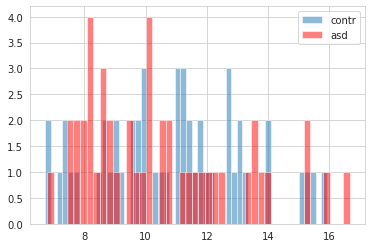

In [18]:
plt.hist(np.unique(df[df['Group']==0].Age), bins=50, label='contr', alpha=0.5)
plt.hist(np.unique(df[df['Group']==1].Age), bins=46, label='asd', color='red', alpha=0.5)
plt.legend()

In [19]:
Age_bin = [round(a) for a in df['Age']]
#for i in range(len(Age_bin)):
#  if Age_bin[i] > 16:
#    Age_bin[i] = 16

(array([273.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 347.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 334.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 463.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 432.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 268.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 266.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 169.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 102.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 107.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  45.]),
 array([ 7.        ,  7.0990099 ,  7.1980198 ,  7.2970297 ,  7.3960396 ,
         7.4950495 ,  7.59405941,  7.69306931,  7.79207921,  7.89108911,
         7.99009901,  8.08910891,  8.18811881,  8.28712871,  8.38613861,
         8.48514851,  8.58415842,  8.68316832,  8.78217822,  8.88118812,
         8.98019802,

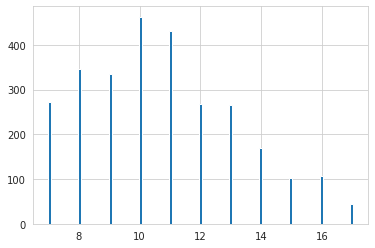

In [20]:
plt.hist(Age_bin, bins=101)

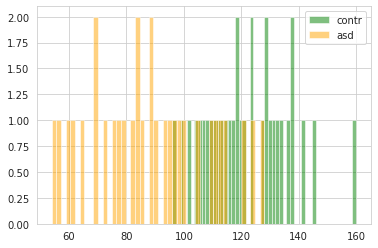

In [21]:
plt.hist(np.unique(df[df['Group']==0].IQ), bins=50, label='contr', alpha=0.5, color='green')
plt.hist(np.unique(df[df['Group']==1].IQ), bins=46, label='asd', color='orange', alpha=0.5)
plt.legend()

In [22]:
IQ_bin = [round(a/10)*10 for a in df['IQ'].values]
#for i in range(len(IQ_bin)):
#  if IQ_bin[i] > 140:
#    IQ_bin[i] = 140
#  if IQ_bin[i] < 60:
#    IQ_bin[i] = 60

(array([ 16.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 183.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 137.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 146.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 336.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 327.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        464.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 581.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 430.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 147.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  39.]),
 array([ 50.        ,  51.08910891,  52.17821782,  53.26732673,
         54.35643564,  55.44554455,  56.53465347,  57.62376238,
         58.71287129,  59.8019802 ,  60.89108911,  61.98019802,
         63.06930693,  64.15841584,  65.24752475,  66.33663366,
         67.42574257,  68.51485149,  69.6039604 ,  70.69

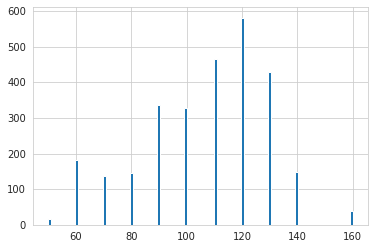

In [23]:
plt.hist(IQ_bin, bins=101)

In [24]:
cols = df.columns
sel_slope = []
for i in range(len(cols)):
  if 'coef_35_45' in cols[i]:
    sel_slope.append(i)

In [25]:
col_unique = set()
for i in cols:
  col_unique.add(i[:10])

In [26]:
col_unique

{'Age',
 'Group',
 'IQ',
 'Subject',
 'Unnamed: 0',
 'alpha_high',
 'alpha_low_',
 'beta_2_40_',
 'coef_2_40_',
 'coef_35_45',
 'delta_2_40',
 'offset_2_4',
 'r2_2_40_ba',
 'r2_2_40_ca',
 'r2_2_40_cu',
 'r2_2_40_en',
 'r2_2_40_fr',
 'r2_2_40_fu',
 'r2_2_40_in',
 'r2_2_40_is',
 'r2_2_40_la',
 'r2_2_40_li',
 'r2_2_40_me',
 'r2_2_40_mi',
 'r2_2_40_pa',
 'r2_2_40_pe',
 'r2_2_40_po',
 'r2_2_40_pr',
 'r2_2_40_ro',
 'r2_2_40_su',
 'r2_2_40_te',
 'r2_2_40_tr',
 'theta_2_40',
 'var_35_45_'}

In [27]:
df_slope = df.iloc[:,sel_slope]
df_slope['Age'] = Age_bin
df_slope['IQ'] = IQ_bin
df_slope['Group'] = df['Group'].values
df_slope.shape


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(2806, 70)

In [28]:
df_slope

,coef_35_45_bankssts-rh,coef_35_45_caudalanteriorcingulate-rh,coef_35_45_caudalmiddlefrontal-rh,coef_35_45_cuneus-rh,coef_35_45_entorhinal-rh,coef_35_45_frontalpole-rh,coef_35_45_fusiform-rh,coef_35_45_inferiorparietal-rh,coef_35_45_inferiortemporal-rh,coef_35_45_insula-rh,...,coef_35_45_rostralmiddlefrontal-lh,coef_35_45_superiorfrontal-lh,coef_35_45_superiorparietal-lh,coef_35_45_superiortemporal-lh,coef_35_45_supramarginal-lh,coef_35_45_temporalpole-lh,coef_35_45_transversetemporal-lh,Age,IQ,Group
0,-3.407684,-0.066113,-3.063276,-3.960296,-0.953466,-1.694825,-2.707379,-3.378527,-2.576670,-2.002253,...,-0.725836,-1.152271,-1.905544,-1.267192,0.130763,-2.366418,-2.000172,11,130,0
1,-3.136564,-1.233351,-4.434811,-2.719042,-3.297486,-1.650590,-2.871403,-2.930710,-2.466686,-3.472446,...,-1.220682,-1.530253,-2.394144,-2.080388,-0.761961,-2.128942,-3.146514,11,130,0
2,-4.141714,-1.971613,-3.738087,-2.103766,-3.205087,1.015009,-3.491095,-4.066944,-3.433390,-3.516501,...,-1.149156,-1.643051,-1.939434,-2.811371,-2.382888,-1.857628,-4.457521,11,130,0
3,-3.551342,-4.221336,-3.774384,-1.300262,-4.044242,-1.265895,-2.018444,-3.693597,-3.341768,-2.783836,...,-1.735935,-2.593365,-1.259099,-2.467130,-1.744996,-1.789943,-3.048600,11,130,0
4,-4.188802,-3.292070,-2.674675,-0.962331,-4.063687,-2.927272,-2.099544,-2.953050,-3.620931,-2.673150,...,-0.393899,-1.922435,-1.067380,-1.941661,-1.396466,-1.754121,-1.847746,11,130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,-1.930573,-1.713836,-2.206724,-0.647718,-3.492825,-0.942452,-2.824773,-0.982301,-2.592448,-2.920927,...,-1.912112,-0.721558,-1.397421,-2.247560,-1.846060,-1.046065,-3.247209,14,100,1
2960,-1.308109,-2.457510,-2.292513,0.463236,-1.637239,-0.337971,-1.821380,-1.008387,-1.598850,-2.131365,...,-1.123702,-0.087426,-1.152849,-2.867880,-1.345303,-1.934948,-2.100857,14,100,1
2961,0.222489,-3.332650,-1.495503,-0.559201,-1.094332,1.605285,-1.141132,0.680152,-0.659270,-0.820518,...,-0.477822,-0.815446,-0.280974,-1.233708,-0.787709,-0.991026,-0.608996,14,100,1
2962,-1.125187,-1.789187,-1.293675,-2.312003,-1.355275,-0.701393,-1.046334,-0.391571,-0.961069,-2.394473,...,-0.290238,-1.193116,-0.336957,-0.135479,-0.815745,0.764297,-1.629767,14,100,1


Try first model

In [29]:
df_my = df_slope

In [30]:
random.seed(0)
randomlist = random.sample(range(0, 95), 19, )
randomlist

[49, 53, 5, 33, 65, 62, 51, 38, 61, 45, 74, 27, 64, 17, 36, 12, 79, 32, 68]

In [31]:
not_inrandom = []
for i in range(95):
  if i not in randomlist:
    not_inrandom.append(i)

In [32]:
test_subjs = df.Subject.unique()[randomlist]
test_subjs

array(['K0074', 'R0007', 'K0010', 'K0053', 'R0031', 'R0024', 'R0003',
       'K0061', 'R0023', 'K0069', 'R0045', 'K0045', 'R0030', 'K0024',
       'K0058', 'K0017', 'R0055', 'K0052', 'R0034'], dtype=object)

In [33]:
train_subjs = df.Subject.unique()[not_inrandom]
train_subjs

array(['K0002', 'K0004', 'K0005', 'K0006', 'K0008', 'K0011', 'K0012',
       'K0013', 'K0014', 'K0015', 'K0016', 'K0018', 'K0019', 'K0020',
       'K0021', 'K0025', 'K0030', 'K0032', 'K0035', 'K0036', 'K0040',
       'K0041', 'K0042', 'K0043', 'K0046', 'K0049', 'K0050', 'K0051',
       'K0054', 'K0056', 'K0059', 'K0062', 'K0063', 'K0064', 'K0066',
       'K0067', 'K0068', 'K0070', 'K0071', 'K0072', 'R0001', 'R0005',
       'R0009', 'R0010', 'R0012', 'R0015', 'R0016', 'R0017', 'R0021',
       'R0028', 'R0032', 'R0033', 'R0036', 'R0038', 'R0039', 'R0040',
       'R0042', 'R0047', 'R0050', 'R0051', 'R0052', 'R0057', 'R0058',
       'R0060', 'R0061', 'R0064', 'R0065', 'R0066', 'R0067', 'R0068',
       'R0069', 'R0070', 'R0071', 'R0073', 'R0074', 'R0075'], dtype=object)

In [34]:
i_train = []
i_test = []
for i in range(len(df)):
  if df.Subject.iloc[i] in test_subjs:
    i_test.append(i)
  else:
    i_train.append(i)

In [35]:
X_train = df_my.drop(columns=['IQ', 'Group']).iloc[i_train,:].values
Y_train = df_my['IQ'].values[i_train]
X_test = df_my.drop(columns=['IQ', 'Group']).iloc[i_test,:].values
Y_test = df_my['IQ'].values[i_test]

In [36]:
df_my[df_my['Group']==0].shape

(1557, 70)

In [37]:
df_my[df_my['Group']==1].shape

(1249, 70)

#Отдельно по группам?

In [38]:
train = df_my.iloc[i_train,:]
test = df_my.iloc[i_test,:]
X_train_c = train[train.Group==0].drop(columns=['IQ']).values
Y_train_c = train[train.Group==0]['IQ'].values
X_test_c = test[test.Group==0].drop(columns=['IQ']).values
Y_test_c = test[test.Group==0]['IQ'].values

X_train_a = train[train.Group==1].drop(columns=['IQ']).values
Y_train_a = train[train.Group==1]['IQ'].values
X_test_a = test[test.Group==1].drop(columns=['IQ']).values
Y_test_a = test[test.Group==1]['IQ'].values

In [39]:
ss = StandardScaler()
X_train_a = ss.fit_transform(X_train_a)
X_test_a = ss.fit_transform(X_test_a)
X_train_c = ss.fit_transform(X_train_c)
X_test_c = ss.fit_transform(X_test_c)

In [39]:
gb_reg = GradientBoostingRegressor(learning_rate=0.05, # for better result set to 0.05
                                   n_estimators=250, # for better result set to 1000
                                   random_state=42)
gb_reg.fit(X_train_a, Y_train_a)
gb_reg.score(X_test_a, Y_test_a)


0.15263613899357464

In [76]:
ests = np.arange(100,3000,400)
scores = []
for i in ests:
  gb_reg = GradientBoostingRegressor(learning_rate=0.01, # for better result set to 0.05
                                   n_estimators=i, # for better result set to 1000
                                   random_state=42)
  gb_reg.fit(X_train_a, Y_train_a)
  scores.append(gb_reg.score(X_test_a, Y_test_a))

Text(0, 0.5, 'score')

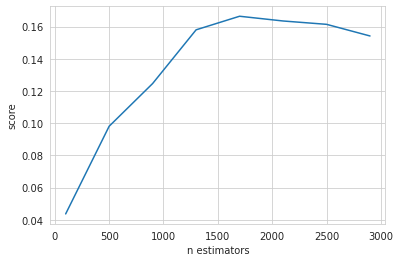

In [77]:
plt.plot(ests, scores)
plt.xlabel('n estimators')
plt.ylabel('score')

In [81]:
depth = np.arange(1,15,4)
scores = []
for i in depth:
  gb_reg = GradientBoostingRegressor(learning_rate=0.01, # for better result set to 0.05
                                   n_estimators=1700, # for better result set to 1000
                                   max_depth = i,
                                   random_state=42)
  gb_reg.fit(X_train_a, Y_train_a)
  scores.append(gb_reg.score(X_test_a, Y_test_a))

Text(0, 0.5, 'score')

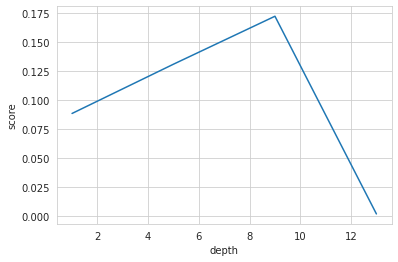

In [83]:
plt.plot(depth, scores)
plt.xlabel('depth')
plt.ylabel('score')

In [84]:
leaf = np.arange(1,10,2)
scores = []
for i in leaf:
  gb_reg = GradientBoostingRegressor(learning_rate=0.01, # for better result set to 0.05
                                   n_estimators=1700, # for better result set to 1000
                                   max_depth = 9,
                                   min_samples_leaf = i,
                                   random_state=42)
  gb_reg.fit(X_train_a, Y_train_a)
  scores.append(gb_reg.score(X_test_a, Y_test_a))

Text(0, 0.5, 'score')

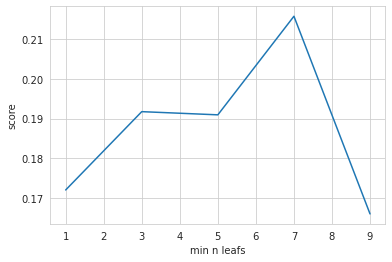

In [85]:
plt.plot(leaf, scores)
plt.xlabel('min n leafs')
plt.ylabel('score')

In [90]:
subs = np.arange(0.1,1,0.2)
scores = []
for i in subs:
  gb_reg = GradientBoostingRegressor(learning_rate=0.01, # for better result set to 0.05
                                   n_estimators=1700, # for better result set to 1000
                                   max_depth = 9,
                                   min_samples_leaf = 7,
                                   subsample = i,
                                   random_state=42)
  gb_reg.fit(X_train_a, Y_train_a)
  scores.append(gb_reg.score(X_test_a, Y_test_a))

Text(0, 0.5, 'score')

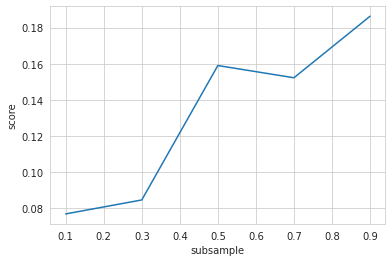

In [91]:
plt.plot(subs, scores)
plt.xlabel('subsample')
plt.ylabel('score')

##Вручную подобранные коэффициенты

In [40]:
gb_reg = GradientBoostingRegressor(learning_rate=0.01,
                                   n_estimators=1700, # for better result set to 1000
                                   max_depth = 9,
                                   min_samples_leaf = 7,
                                   subsample = 1,
                                   random_state=42)
gb_reg.fit(X_train_a, Y_train_a)
gb_reg.score(X_test_a, Y_test_a)

0.21572545632177187

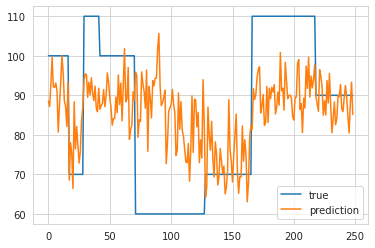

In [41]:
plt.plot(Y_test_a, label='true')
plt.plot(gb_reg.predict(X_test_a), label='prediction')
plt.legend()

In [42]:
# Fits the explainer
explainer = shap.Explainer(gb_reg.predict, X_test_a)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_a)

Permutation explainer: 250it [08:37,  2.09s/it]


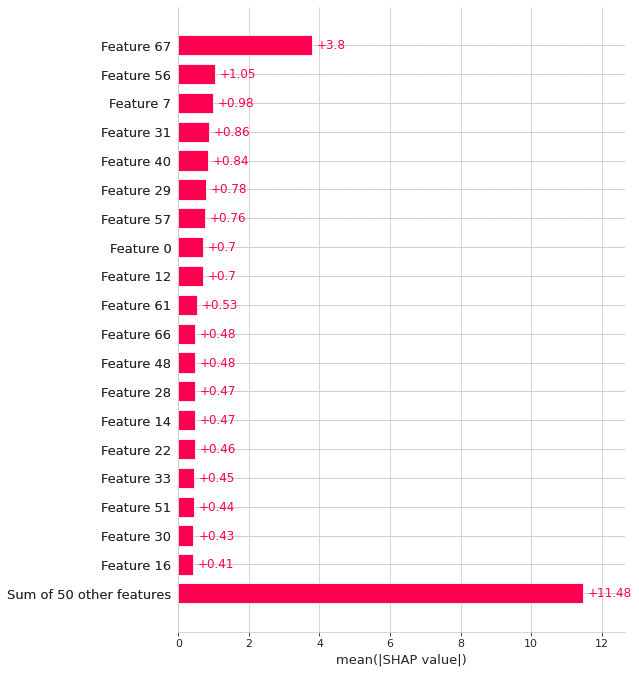

In [43]:
shap.plots.bar(shap_values, max_display=20)

In [46]:
vals = np.abs(shap_values.values).mean(0)
feature_names = train[train.Group==1].drop(columns=['IQ']).columns

feature_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                 columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],
                              ascending=False, inplace=True)
feature_importance.iloc[:50,:]

,col_name,feature_importance_vals
67,Age,3.795728
56,coef_35_45_posteriorcingulate-lh,1.048298
7,coef_35_45_inferiorparietal-rh,0.979762
31,coef_35_45_supramarginal-rh,0.861737
40,coef_35_45_inferiorparietal-lh,0.841453
29,coef_35_45_superiorparietal-rh,0.782177
57,coef_35_45_precentral-lh,0.758985
0,coef_35_45_bankssts-rh,0.703160
12,coef_35_45_lateralorbitofrontal-rh,0.701637
61,coef_35_45_superiorfrontal-lh,0.529628


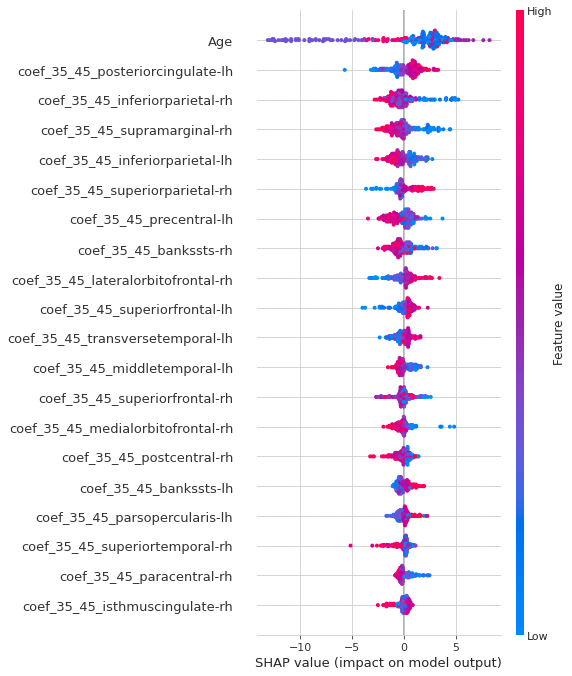

In [48]:
shap.summary_plot(shap_values, 
                  features=test[test.Group==1].drop(columns=['IQ']).values, 
                  feature_names=test[test.Group==1].drop(columns=['IQ']).columns)

In [57]:
np.array(feature_importance.index.tolist())[:20]

array([67, 56,  7, 31, 40, 29, 57,  0, 12, 61, 66, 48, 28, 14, 22, 33, 51,
       30, 16, 10])

In [54]:
#goods = np.array([67, 56,  7, 31, 40, 29, 57,  0, 12, 61, 66, 48, 28, 14, 22, 33, 51, 30, 16, 10])
score = []

for i in range(12,30,5):
  goods = np.array(feature_importance.index.tolist())[:i]
  X_train_a = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods]
  Y_train_a = train[train.Group==1]['IQ']
  X_test_a = test[test.Group==1].drop(columns=['IQ']).iloc[:,goods]
  Y_test_a = test[test.Group==1]['IQ']

  ss = StandardScaler()
  X_train_a = ss.fit_transform(X_train_a)
  X_test_a = ss.fit_transform(X_test_a)

  gb_reg = GradientBoostingRegressor(learning_rate=0.01,
                                   n_estimators=1700, # for better result set to 1000
                                   max_depth = 9,
                                   min_samples_leaf = 7,
                                   subsample = 1,
                                   random_state=42)
  gb_reg.fit(X_train_a, Y_train_a)
  score.append(gb_reg.score(X_test_a, Y_test_a))

Text(0, 0.5, 'score')

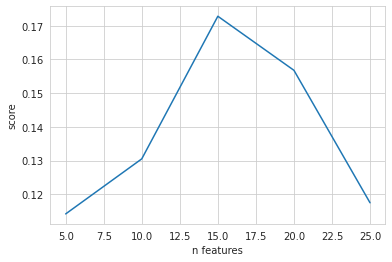

In [55]:
plt.plot(np.arange(5,30,5), score)
plt.xlabel('n features')
plt.ylabel('score')

In [58]:
#goods = np.array([67, 56,  7, 31, 40, 29, 57,  0, 12, 61, 66, 48, 28, 14, 22, 33, 51, 30, 16, 10])
score = []

for i in range(13,18,1):
  goods = np.array(feature_importance.index.tolist())[:i]
  X_train_a = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods]
  Y_train_a = train[train.Group==1]['IQ']
  X_test_a = test[test.Group==1].drop(columns=['IQ']).iloc[:,goods]
  Y_test_a = test[test.Group==1]['IQ']

  ss = StandardScaler()
  X_train_a = ss.fit_transform(X_train_a)
  X_test_a = ss.fit_transform(X_test_a)

  gb_reg = GradientBoostingRegressor(learning_rate=0.01,
                                   n_estimators=1700, # for better result set to 1000
                                   max_depth = 9,
                                   min_samples_leaf = 7,
                                   subsample = 1,
                                   random_state=42)
  gb_reg.fit(X_train_a, Y_train_a)
  score.append(gb_reg.score(X_test_a, Y_test_a))

Text(0, 0.5, 'score')

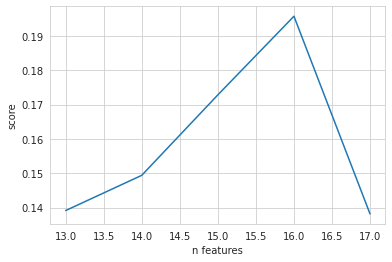

In [60]:
plt.plot(np.arange(13,18,1), score)
plt.xlabel('n features')
plt.ylabel('score')

In [142]:

goods = np.array([67, 31, 0, 61, 66, 48, 14, 22, 16])
score = []

X_train_a = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_train_a = train[train.Group==1]['IQ']
X_test_a = test[test.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_test_a = test[test.Group==1]['IQ']

ss = StandardScaler()
X_train_a = ss.fit_transform(X_train_a)
X_test_a = ss.fit_transform(X_test_a)

gb_reg = GradientBoostingRegressor(learning_rate=0.01,
                                   n_estimators=250, # for better result set to 1000
                                   max_depth = 9,
                                   min_samples_leaf = 7,
                                   subsample = 1,
                                   random_state=42)
gb_reg.fit(X_train_a, Y_train_a)
gb_reg.score(X_test_a, Y_test_a)

0.3769904404810508

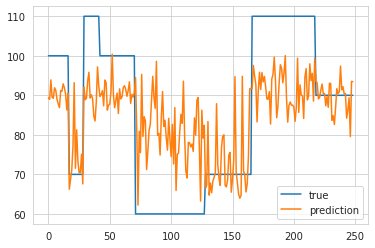

In [144]:
plt.plot(np.arange(len(Y_test_a)), Y_test_a, label='true')
plt.plot(np.arange(len(Y_test_a)), gb_reg.predict(X_test_a), label='prediction')
plt.legend()

In [145]:
train[train.Group==1].drop(columns=['IQ']).iloc[:,goods].columns

Index(['Age', 'coef_35_45_supramarginal-rh', 'coef_35_45_bankssts-rh',
       'coef_35_45_superiorfrontal-lh', 'coef_35_45_transversetemporal-lh',
       'coef_35_45_middletemporal-lh', 'coef_35_45_medialorbitofrontal-rh',
       'coef_35_45_postcentral-rh', 'coef_35_45_paracentral-rh'],
      dtype='object')

##Gradient boosting is not the best solution...

In [40]:
import xgboost

#goods = np.array([67, 31, 0, 61, 66, 48, 14, 22, 16])

X_train_a = train[train.Group==1].drop(columns=['IQ'])#.iloc[:,goods]
Y_train_a = train[train.Group==1]['IQ']
X_test_a = test[test.Group==1].drop(columns=['IQ'])#.iloc[:,goods]
Y_test_a = test[test.Group==1]['IQ']

ss = StandardScaler()
X_train_a = ss.fit_transform(X_train_a)
X_test_a = ss.fit_transform(X_test_a)

xgb_reg =  xgboost.XGBRegressor(n_estimators=1000,  
                     learning_rate=0.01, 
                     max_depth=5, 
                     random_state=42,
                     min_child_weight=9, # not exact analogue for min_samples_leaf
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     objective ='reg:squarederror') 
xgb_reg.fit(X_train_a, Y_train_a)
xgb_reg.score(X_test_a, Y_test_a)

0.16068157187353316

In [156]:
# Fits the explainer
explainer = shap.Explainer(xgb_reg.predict, X_test_a)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_a)

Permutation explainer: 250it [05:47,  1.43s/it]


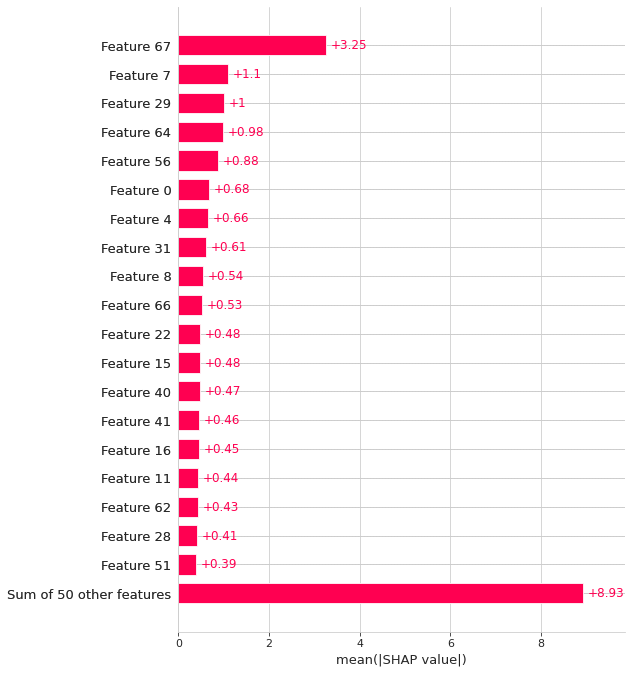

In [157]:
shap.plots.bar(shap_values, max_display=20)

In [158]:
vals = np.abs(shap_values.values).mean(0)
feature_names = train[train.Group==1].drop(columns=['IQ']).columns

feature_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                 columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],
                              ascending=False, inplace=True)
feature_importance.iloc[:50,:]

,col_name,feature_importance_vals
67,Age,3.246092
7,coef_35_45_inferiorparietal-rh,1.104005
29,coef_35_45_superiorparietal-rh,0.998035
64,coef_35_45_supramarginal-lh,0.978439
56,coef_35_45_posteriorcingulate-lh,0.879935
0,coef_35_45_bankssts-rh,0.676821
4,coef_35_45_entorhinal-rh,0.660380
31,coef_35_45_supramarginal-rh,0.605487
8,coef_35_45_inferiortemporal-rh,0.535923
66,coef_35_45_transversetemporal-lh,0.532259


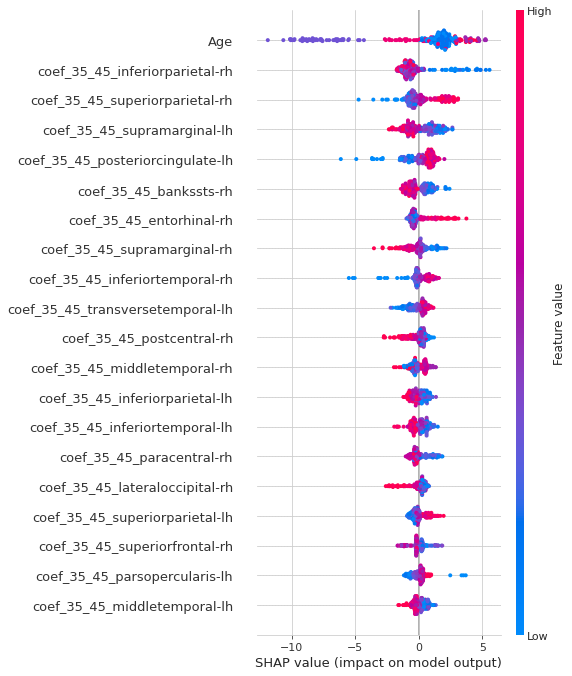

In [159]:
shap.summary_plot(shap_values, 
                  features=test[test.Group==1].drop(columns=['IQ']).values, 
                  feature_names=test[test.Group==1].drop(columns=['IQ']).columns)

In [160]:
np.array(feature_importance.index.tolist())[:20]

array([67,  7, 29, 64, 56,  0,  4, 31,  8, 66, 22, 15, 40, 41, 16, 11, 62,
       28, 51, 48])

In [163]:
score = []

for i in range(1,60,5):
  goods = np.array(feature_importance.index.tolist())[:i]
  X_train_a = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods]
  Y_train_a = train[train.Group==1]['IQ']
  X_test_a = test[test.Group==1].drop(columns=['IQ']).iloc[:,goods]
  Y_test_a = test[test.Group==1]['IQ']

  ss = StandardScaler()
  X_train_a = ss.fit_transform(X_train_a)
  X_test_a = ss.fit_transform(X_test_a)

  xgb_reg =  xgboost.XGBRegressor(n_estimators=1000,  
                     learning_rate=0.01, 
                     max_depth=5, 
                     random_state=42,
                     min_child_weight=9, # not exact analogue for min_samples_leaf
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     objective ='reg:squarederror') 
  xgb_reg.fit(X_train_a, Y_train_a)
  score.append(xgb_reg.score(X_test_a, Y_test_a))

Text(0, 0.5, 'score')

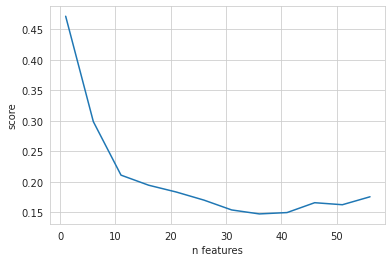

In [165]:
plt.plot(np.arange(1,60,5), score)
plt.xlabel('n features')
plt.ylabel('score')

In [262]:
#array([67,  7, 29, 64, 56,  0,  4, 31,  8, 66, 22, 15, 40, 41, 16, 11, 62,28, 51, 48])
goods = np.array([67, 7, 64, 56,  0, 66, 22])

X_train_a = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_train_a = train[train.Group==1]['IQ']  
X_test_a = test[test.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_test_a = test[test.Group==1]['IQ']

ss = StandardScaler()
X_train_a = ss.fit_transform(X_train_a)
X_test_a = ss.fit_transform(X_test_a)

xgb_reg =  xgboost.XGBRegressor(n_estimators=1000,  
                     learning_rate=0.01, 
                     max_depth=5, 
                     random_state=42,
                     min_child_weight=9, # not exact analogue for min_samples_leaf
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     objective ='reg:squarederror') 
xgb_reg.fit(X_train_a, Y_train_a)
xgb_reg.score(X_test_a, Y_test_a)

0.2992590720461169

In [263]:
train[train.Group==1].drop(columns=['IQ']).iloc[:,goods].columns

Index(['Age', 'coef_35_45_inferiorparietal-rh', 'coef_35_45_supramarginal-lh',
       'coef_35_45_posteriorcingulate-lh', 'coef_35_45_bankssts-rh',
       'coef_35_45_transversetemporal-lh', 'coef_35_45_postcentral-rh'],
      dtype='object')

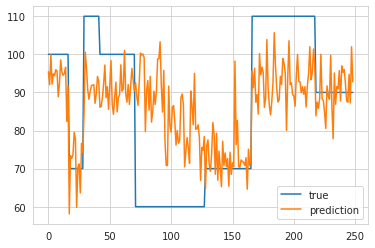

In [264]:
plt.plot(np.arange(len(Y_test_a)), Y_test_a, label='true')
plt.plot(np.arange(len(Y_test_a)), xgb_reg.predict(X_test_a), label='prediction')
plt.legend()

In [273]:
goods = np.array([67, 7, 64, 56, 0, 66, 22])
score = []
#lr = [0.001, 0.01, 0.05, 0.1]

#'learning_rate':[0.001, 0.01, 0.05, 0.1],
#'n_estimators':[250, 500, 1000, 1500, 2000],
#'max_depth':[2,4,8,10],
#'min_child_weight': [3, 5, 7, 9],
#'max_delta_step':[0,5,10],
#'max_features':[3,6,9],
#'subsample':[0.6,0.8,1]}
ij = []

for i in [1500, 2000, 2500, 3000]:
  for j in [1,2,3]:
    ij.append([i,j])
    X_train_a = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods]
    Y_train_a = train[train.Group==1]['IQ']  
    X_test_a = test[test.Group==1].drop(columns=['IQ']).iloc[:,goods]
    Y_test_a = test[test.Group==1]['IQ']

    ss = StandardScaler()
    X_train_a = ss.fit_transform(X_train_a)
    X_test_a = ss.fit_transform(X_test_a)

    xgb_reg =  xgboost.XGBRegressor(n_estimators=i,  
                     learning_rate=0.01, 
                     max_depth=j, 
                     random_state=42,
                     min_child_weight=9, # not exact analogue for min_samples_leaf
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     objective ='reg:squarederror') 
    xgb_reg.fit(X_train_a, Y_train_a)
    score.append(xgb_reg.score(X_test_a, Y_test_a))

In [274]:
ij[np.argmax(score)]

[2000, 2]

Text(0, 0.5, 'score')

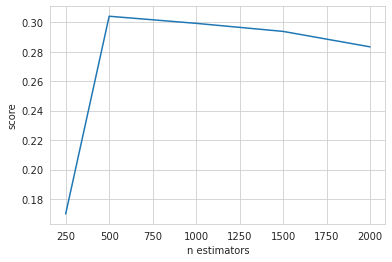

In [268]:
plt.plot([250, 500, 1000, 1500, 2000], score)
plt.xlabel('n estimators')
plt.ylabel('score')

In [277]:
goods = np.array([67, 7, 64, 56,  0, 66, 22])
score = []
#lr = [0.001, 0.01, 0.05, 0.1]

#'learning_rate':[0.001, 0.01, 0.05, 0.1],
#'n_estimators':[250, 500, 1000, 1500, 2000], #best 2000
#'max_depth':[2,4,8,10], #best 2
#'min_child_weight': [3, 5, 7, 9],
#'max_delta_step':[0,5,10],
#'max_features':[3,6,9],
#'subsample':[0.6,0.8,1]}
ij = []

for i in [8, 9, 10, 11]:
  for j in [0]:
    ij.append([i,j])
    X_train_a = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods]
    Y_train_a = train[train.Group==1]['IQ']  
    X_test_a = test[test.Group==1].drop(columns=['IQ']).iloc[:,goods]
    Y_test_a = test[test.Group==1]['IQ']

    ss = StandardScaler()
    X_train_a = ss.fit_transform(X_train_a)
    X_test_a = ss.fit_transform(X_test_a)

    xgb_reg =  xgboost.XGBRegressor(n_estimators=2000,  
                     learning_rate=0.01, 
                     max_depth=2, 
                     random_state=42,
                     min_child_weight=i, # not exact analogue for min_samples_leaf
                     max_delta_step=j,
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     objective ='reg:squarederror') 
    xgb_reg.fit(X_train_a, Y_train_a)
    score.append(xgb_reg.score(X_test_a, Y_test_a))

In [278]:
ij[np.argmax(score)]

[8, 0]

In [283]:
X_train_a = train[train.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_train_a = train[train.Group==1]['IQ']  
X_test_a = test[test.Group==1].drop(columns=['IQ']).iloc[:,goods]
Y_test_a = test[test.Group==1]['IQ']

ss = StandardScaler()
X_train_a = ss.fit_transform(X_train_a)
X_test_a = ss.fit_transform(X_test_a)

xgb_reg =  xgboost.XGBRegressor(n_estimators=2000,  
                     learning_rate=0.01, 
                     max_depth=2, 
                     random_state=42,
                     min_child_weight=8, # not exact analogue for min_samples_leaf
                     max_delta_step=0,
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     objective ='reg:squarederror') 
xgb_reg.fit(X_train_a, Y_train_a)
xgb_reg.score(X_test_a, Y_test_a)

0.3297222727000464

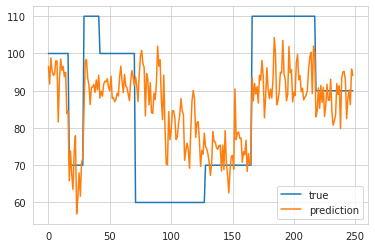

In [284]:
plt.plot(np.arange(len(Y_test_a)), Y_test_a, label='true')
plt.plot(np.arange(len(Y_test_a)), xgb_reg.predict(X_test_a), label='prediction')
plt.legend()

##Try in all features

In [42]:
df_my = df.copy()
df_my['Age'] = Age_bin
df_my['IQ'] = IQ_bin
df_my['Group'] = df['Group'].values
df_my.shape

(2806, 675)

In [43]:
train_all = df_my.iloc[i_train,:]
test_all = df_my.iloc[i_test,:]

##Autism

In [331]:
X_train_a = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject'])
Y_train_a = train_all[train_all.Group==1]['IQ']
X_test_a = test_all[test_all.Group==1].drop(columns=['IQ', 'Subject'])
Y_test_a = test_all[test_all.Group==1]['IQ']

ss = StandardScaler()
X_train_a = ss.fit_transform(X_train_a)
X_test_a = ss.fit_transform(X_test_a)

xgb_reg =  xgboost.XGBRegressor(n_estimators=2000,  
                     learning_rate=0.01, 
                     max_depth=2, 
                     random_state=42,
                     min_child_weight=8, # not exact analogue for min_samples_leaf
                     max_delta_step=0,
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     objective ='reg:squarederror') 

xgb_reg.fit(X_train_a, Y_train_a)

# Compute accuracy based on test samples
print("The model training score is" , xgb_reg.score(X_test_a, Y_test_a))

The model training score is -0.10852376632061445


In [339]:
score = []
#lr = [0.001, 0.01, 0.05, 0.1]

#'learning_rate':[0.001, 0.01, 0.05, 0.1],
#'n_estimators':[250, 500, 1000, 1500, 2000],
#'max_depth':[2,4,8,10],
#'min_child_weight': [3, 5, 7, 9],
#'max_delta_step':[0,5,10],
#'max_features':[3,6,9],
#'subsample':[0.6,0.8,1]}
ij = []

for i in [1300, 1500, 1700]:
  for j in [1,2]:
    ij.append([i,j])
    X_train_a = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject'])
    Y_train_a = train_all[train_all.Group==1]['IQ']  
    X_test_a = test_all[test_all.Group==1].drop(columns=['IQ', 'Subject'])
    Y_test_a = test_all[test_all.Group==1]['IQ']

    ss = StandardScaler()
    X_train_a = ss.fit_transform(X_train_a)
    X_test_a = ss.fit_transform(X_test_a)

    xgb_reg =  xgboost.XGBRegressor(n_estimators=i,  
                     learning_rate=0.01, 
                     max_depth=j, 
                     random_state=42,
                     min_child_weight=9, # not exact analogue for min_samples_leaf
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     objective ='reg:squarederror') 
    xgb_reg.fit(X_train_a, Y_train_a)
    score.append(xgb_reg.score(X_test_a, Y_test_a))

In [340]:
ij[np.argmax(score)]

[1300, 1]

In [347]:
score = []
#lr = [0.001, 0.01, 0.05, 0.1]

#'learning_rate':[0.001, 0.01, 0.05, 0.1],
#'n_estimators':[250, 500, 1000, 1500, 2000],
#'max_depth':[2,4,8,10],
#'min_child_weight': [3, 5, 7, 9],
#'max_delta_step':[0,5,10],
#'max_features':[3,6,9],
#'subsample':[0.6,0.8,1]}
ij = []

for i in [1,2]:
  for j in [0]:
    ij.append([i,j])
    X_train_a = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject'])
    Y_train_a = train_all[train_all.Group==1]['IQ']  
    X_test_a = test_all[test_all.Group==1].drop(columns=['IQ', 'Subject'])
    Y_test_a = test_all[test_all.Group==1]['IQ']

    ss = StandardScaler()
    X_train_a = ss.fit_transform(X_train_a)
    X_test_a = ss.fit_transform(X_test_a)

    xgb_reg =  xgboost.XGBRegressor(n_estimators=1300,  
                     learning_rate=0.01, 
                     max_depth=1, 
                     random_state=42,
                     min_child_weight=i, # not exact analogue for min_samples_leaf
                     max_delta_step = j,
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     objective ='reg:squarederror') 
    xgb_reg.fit(X_train_a, Y_train_a)
    score.append(xgb_reg.score(X_test_a, Y_test_a))

In [348]:
ij[np.argmax(score)]

[1, 0]

In [351]:
score = []
#lr = [0.001, 0.01, 0.05, 0.1]

#'learning_rate':[0.001, 0.01, 0.05, 0.1],
#'n_estimators':[250, 500, 1000, 1500, 2000],
#'max_depth':[2,4,8,10],
#'min_child_weight': [3, 5, 7, 9],
#'max_delta_step':[0,5,10],
#'max_features':[3,6,9],
#'subsample':[0.6,0.8,1]}
ij = []

for i in [1,2,3]:
  for j in [1]:
    ij.append([i,j])
    X_train_a = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject'])
    Y_train_a = train_all[train_all.Group==1]['IQ']  
    X_test_a = test_all[test_all.Group==1].drop(columns=['IQ', 'Subject'])
    Y_test_a = test_all[test_all.Group==1]['IQ']

    ss = StandardScaler()
    X_train_a = ss.fit_transform(X_train_a)
    X_test_a = ss.fit_transform(X_test_a)

    xgb_reg =  xgboost.XGBRegressor(n_estimators=1300,  
                     learning_rate=0.01, 
                     max_depth=1, 
                     random_state=42,
                     min_child_weight=1, # not exact analogue for min_samples_leaf
                     max_delta_step =0,
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     max_features = i,
                     subsample = j,
                     objective ='reg:squarederror') 
    xgb_reg.fit(X_train_a, Y_train_a)
    score.append(xgb_reg.score(X_test_a, Y_test_a))

In [352]:
ij[np.argmax(score)]

[1, 1]

In [353]:
score = []
#lr = [0.001, 0.01, 0.05, 0.1]

#'learning_rate':[0.001, 0.01, 0.05, 0.1],
#'n_estimators':[250, 500, 1000, 1500, 2000],
#'max_depth':[2,4,8,10],
#'min_child_weight': [3, 5, 7, 9],
#'max_delta_step':[0,5,10],
#'max_features':[3,6,9],
#'subsample':[0.6,0.8,1]}
ij = []

for i in [0.001, 0.01, 0.05, 0.1]:
  for j in [1]:
    ij.append([i,j])
    X_train_a = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject'])
    Y_train_a = train_all[train_all.Group==1]['IQ']  
    X_test_a = test_all[test_all.Group==1].drop(columns=['IQ', 'Subject'])
    Y_test_a = test_all[test_all.Group==1]['IQ']

    ss = StandardScaler()
    X_train_a = ss.fit_transform(X_train_a)
    X_test_a = ss.fit_transform(X_test_a)

    xgb_reg =  xgboost.XGBRegressor(n_estimators=1300,  
                     learning_rate=i, 
                     max_depth=1, 
                     random_state=42,
                     min_child_weight=1, # not exact analogue for min_samples_leaf
                     max_delta_step =0,
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     max_features = 1,
                     subsample = 1,
                     objective ='reg:squarederror') 
    xgb_reg.fit(X_train_a, Y_train_a)
    score.append(xgb_reg.score(X_test_a, Y_test_a))

In [354]:
ij[np.argmax(score)]

[0.01, 1]

In [355]:
xgb_reg =  xgboost.XGBRegressor(n_estimators=1300,  
                     learning_rate=0.01, 
                     max_depth=1, 
                     random_state=42,
                     min_child_weight=1, # not exact analogue for min_samples_leaf
                     max_delta_step =0,
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     max_features = 1,
                     subsample = 1,
                     objective ='reg:squarederror') 
xgb_reg.fit(X_train_a, Y_train_a)
xgb_reg.score(X_test_a, Y_test_a)

0.10581771256522521

In [356]:
xgb_reg.score(X_train_a, Y_train_a)

0.6400169852744093

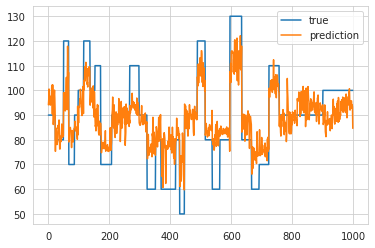

In [358]:
plt.plot(np.arange(len(Y_train_a)), Y_train_a, label='true')
plt.plot(np.arange(len(Y_train_a)), xgb_reg.predict(X_train_a), label='prediction')
plt.legend()

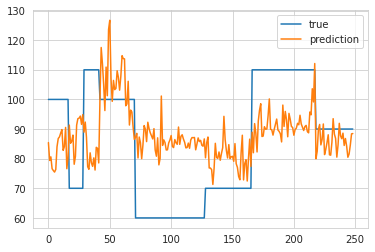

In [359]:
plt.plot(np.arange(len(Y_test_a)), Y_test_a, label='true')
plt.plot(np.arange(len(Y_test_a)), xgb_reg.predict(X_test_a), label='prediction')
plt.legend()

In [361]:
X_train_a = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject'])
Y_train_a = train_all[train_all.Group==1]['IQ']  
X_test_a = test_all[test_all.Group==1].drop(columns=['IQ', 'Subject'])
Y_test_a = test_all[test_all.Group==1]['IQ']

ss = StandardScaler()
X_train_a = ss.fit_transform(X_train_a)
X_test_a = ss.fit_transform(X_test_a)

xgb_reg =  xgboost.XGBRegressor(n_estimators=1300,  
                     learning_rate=0.01, 
                     max_depth=1, 
                     random_state=42,
                     min_child_weight=1, # not exact analogue for min_samples_leaf
                     max_delta_step =0,
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     max_features = 1,
                     subsample = 1,
                     objective ='reg:squarederror') 
xgb_reg.fit(X_train_a, Y_train_a)

XGBRegressor(learning_rate=0.01, max_depth=1, max_features=1, n_estimators=1300,
             n_jobs=-1, objective='reg:squarederror', random_state=42)

In [362]:
# Fits the explainer
explainer = shap.Explainer(xgb_reg.predict, X_test_a)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_a, max_evals=1345)

Permutation explainer: 250it [23:38,  5.72s/it]


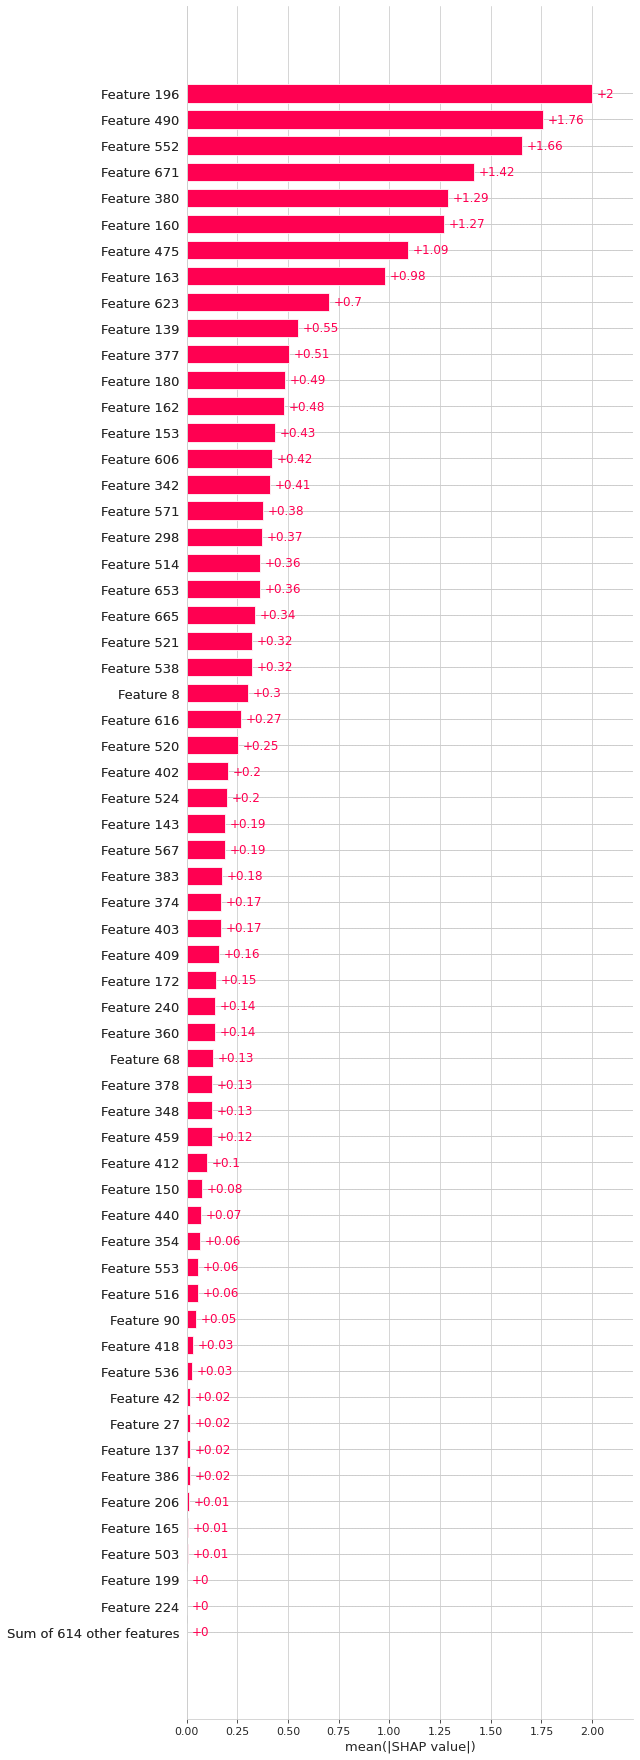

In [363]:
shap.plots.bar(shap_values, max_display=60)

In [364]:
vals = np.abs(shap_values.values).mean(0)
feature_names = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).columns

feature_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                 columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],
                              ascending=False, inplace=True)
feature_importance.iloc[:50,:]

,col_name,feature_importance_vals
196,coef_2_40_superiorfrontal-lh,1.997511
490,beta_2_40_parstriangularis-rh,1.759755
552,theta_2_40_middletemporal-rh,1.656176
671,Age,1.415231
380,alpha_low_2_40_lateraloccipital-lh,1.287315
160,coef_2_40_precuneus-rh,1.268911
475,beta_2_40_frontalpole-rh,1.093139
163,coef_2_40_superiorfrontal-rh,0.979758
623,delta_2_40_parsorbitalis-rh,0.701335
139,coef_2_40_entorhinal-rh,0.547998


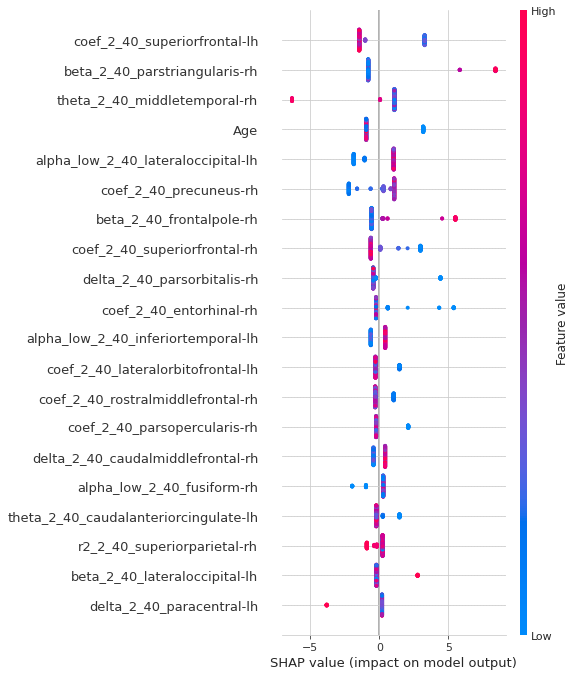

In [365]:
shap.summary_plot(shap_values, 
                  features=test_all[test_all.Group==1].drop(columns=['IQ', 'Subject']).values, 
                  feature_names=test_all[test_all.Group==1].drop(columns=['IQ', 'Subject']).columns)

In [366]:
test_all[test_all.Group==1].drop(columns=['IQ', 'Subject']).values.shape

(249, 673)

In [367]:
shap_values.shape

(249, 673)

In [368]:
train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]

,coef_2_40_superiorfrontal-lh,beta_2_40_parstriangularis-rh,theta_2_40_middletemporal-rh,beta_2_40_parahippocampal-lh,Age,coef_2_40_precuneus-rh,beta_2_40_parahippocampal-rh,delta_2_40_superiorfrontal-lh,coef_2_40_superiorfrontal-rh,beta_2_40_parsopercularis-lh,...,coef_2_40_rostralmiddlefrontal-rh,alpha_low_2_40_inferiortemporal-lh,offset_2_40_frontalpole-lh,offset_2_40_lateraloccipital-lh,offset_2_40_caudalmiddlefrontal-lh,r2_2_40_superiorparietal-rh,offset_2_40_precentral-lh,beta_2_40_lateralorbitofrontal-rh,theta_2_40_caudalanteriorcingulate-rh,delta_2_40_caudalmiddlefrontal-rh
1637,1.030823,1.230352,1.039141,1.307154,15,1.149858,1.326842,0.989762,1.015638,1.354868,...,0.851146,1.297178,-0.408633,-0.342985,-0.323029,0.968585,-0.319665,1.201146,1.042327,0.949899
1638,0.913759,1.213326,1.132688,1.290976,15,1.167405,1.226278,0.967692,0.906930,1.250183,...,0.867067,1.322674,-0.406082,-0.149960,-0.406057,0.988289,-0.359872,1.160866,1.058219,0.962729
1639,0.756382,1.176759,1.144651,1.272135,15,1.229035,1.219502,0.936135,0.816734,1.203476,...,0.737459,1.359863,-0.718337,0.014629,-0.544629,0.984272,-0.410015,1.132487,1.058981,0.930955
1640,0.861486,1.173845,1.089371,1.272708,15,1.290562,1.223931,0.999742,0.914435,1.266845,...,0.879232,1.385781,-0.721644,0.039424,-0.488550,0.978502,-0.374405,1.143409,1.056785,0.970966
1641,0.893576,1.170989,1.031729,1.282391,15,1.258139,1.222376,0.976426,0.868804,1.221307,...,0.796305,1.284972,-0.521201,-0.156088,-0.430114,0.988226,-0.388119,1.126716,1.068470,0.970650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,1.013749,1.147081,1.122854,1.085102,14,1.263650,1.088144,0.995541,1.016607,1.171594,...,0.912385,1.352480,-0.394609,-0.390601,-0.403779,0.993335,-0.376807,1.105007,1.165014,1.001769
2960,1.002248,1.101459,1.119361,1.173741,14,1.288743,1.108952,1.002046,1.046840,1.066562,...,1.004132,1.274374,-0.382649,-0.349518,-0.448983,0.992038,-0.464069,1.074185,1.128166,0.965964
2961,0.934940,1.107424,1.098247,1.214116,14,1.336780,1.114255,1.009733,0.937353,1.052472,...,0.984147,1.284950,-0.316077,-0.238273,-0.441786,0.989256,-0.270513,1.046877,1.092347,0.971305
2962,0.955267,1.039633,1.080947,1.215721,14,1.347783,1.087745,0.999652,1.005466,1.071841,...,1.120008,1.191653,-0.262283,-0.222049,-0.456373,0.990240,-0.284825,1.033784,1.104748,1.037363


In [376]:
n_feats = np.arange(1,30,1)
#scores_train = []
scores_test = []

for i in n_feats:
  goods = np.array(feature_importance.index[:i].tolist())

  X_train_a = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
  Y_train_a = train_all[train_all.Group==1]['IQ']
  X_test_a = test_all[test_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
  Y_test_a = test_all[test_all.Group==1]['IQ']

  ss = StandardScaler()
  X_train_a = ss.fit_transform(X_train_a)
  X_test_a = ss.fit_transform(X_test_a)

  xgb_reg =  xgboost.XGBRegressor(n_estimators=1300,  
                     learning_rate=0.01, 
                     max_depth=1, 
                     random_state=42,
                     min_child_weight=1, # not exact analogue for min_samples_leaf
                     max_delta_step =0,
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     max_features = 1,
                     subsample = 1,
                     objective ='reg:squarederror') 

  xgb_reg.fit(X_train_a, Y_train_a)
  scores_test.append(xgb_reg.score(X_test_a, Y_test_a))

Text(0, 0.5, 'score')

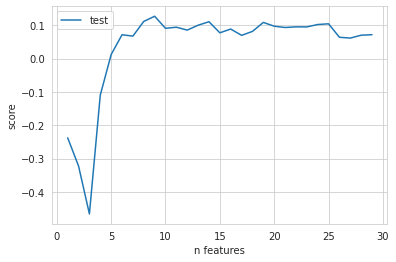

In [377]:
plt.plot(n_feats, scores_test, label='test')
plt.legend()
plt.xlabel('n features')
plt.ylabel('score')

In [378]:
goods = np.array(feature_importance.index[:20].tolist())

In [379]:
np.array(feature_importance.index[:20].tolist())

array([196, 490, 552, 671, 380, 160, 475, 163, 623, 139, 377, 180, 162,
       153, 606, 342, 571, 298, 514, 653])

In [380]:
goods = np.array([196, 490, 552, 671, 380, 160, 475, 163, 623, 139, 377, 180, 162, 153, 606, 342, 571, 298, 514, 653])
train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods].columns

Index(['coef_2_40_superiorfrontal-lh', 'beta_2_40_parstriangularis-rh',
       'theta_2_40_middletemporal-rh', 'Age',
       'alpha_low_2_40_lateraloccipital-lh', 'coef_2_40_precuneus-rh',
       'beta_2_40_frontalpole-rh', 'coef_2_40_superiorfrontal-rh',
       'delta_2_40_parsorbitalis-rh', 'coef_2_40_entorhinal-rh',
       'alpha_low_2_40_inferiortemporal-lh',
       'coef_2_40_lateralorbitofrontal-lh',
       'coef_2_40_rostralmiddlefrontal-rh', 'coef_2_40_parsopercularis-rh',
       'delta_2_40_caudalmiddlefrontal-rh', 'alpha_low_2_40_fusiform-rh',
       'theta_2_40_caudalanteriorcingulate-lh', 'r2_2_40_superiorparietal-rh',
       'beta_2_40_lateraloccipital-lh', 'delta_2_40_paracentral-lh'],
      dtype='object')

In [44]:
goods = np.array([490, 671, 160, 162, 153, 342, 298, 514])#best

X_train_a = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
Y_train_a = train_all[train_all.Group==1]['IQ']
X_test_a = test_all[test_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
Y_test_a = test_all[test_all.Group==1]['IQ']

ss = StandardScaler()
X_train_a = ss.fit_transform(X_train_a)
X_test_a = ss.fit_transform(X_test_a)

xgb_reg =  xgboost.XGBRegressor(n_estimators=1300,  
                     learning_rate=0.01, 
                     max_depth=1, 
                     random_state=42,
                     min_child_weight=1, # not exact analogue for min_samples_leaf
                     max_delta_step =0,
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     max_features = 1,
                     subsample = 1,
                     objective ='reg:squarederror') 

xgb_reg.fit(X_train_a, Y_train_a)
xgb_reg.score(X_test_a, Y_test_a)

0.3491194736677836

In [45]:
goods = np.array([490, 671, 160, 162, 153, 342, 298, 514])#best
train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods].columns

Index(['beta_2_40_parstriangularis-rh', 'Age', 'coef_2_40_precuneus-rh',
       'coef_2_40_rostralmiddlefrontal-rh', 'coef_2_40_parsopercularis-rh',
       'alpha_low_2_40_fusiform-rh', 'r2_2_40_superiorparietal-rh',
       'beta_2_40_lateraloccipital-lh'],
      dtype='object')

In [46]:
xgb_reg =  xgboost.XGBRegressor(n_estimators=1300,  
                     learning_rate=0.01, 
                     max_depth=1, 
                     random_state=42,
                     min_child_weight=1, # not exact analogue for min_samples_leaf
                     max_delta_step =0,
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     max_features = 1,
                     subsample = 1,
                     objective ='reg:squarederror') 

xgb_reg.fit(X_train_a, Y_train_a)
xgb_reg.score(X_train_a, Y_train_a)

0.505698892014766

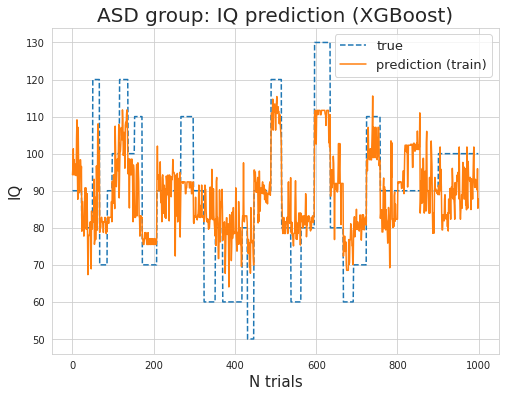

In [54]:
fig = plt.figure(figsize=(8,6))
plt.title('ASD group: IQ prediction (XGBoost)', fontsize=20)
plt.plot(np.arange(len(Y_train_a)), Y_train_a, label='true', linestyle='--')
plt.plot(np.arange(len(Y_train_a)), xgb_reg.predict(X_train_a), label='prediction (train)', linestyle='-')
plt.xlabel('N trials', fontsize=15)
plt.ylabel('IQ', fontsize=15)
plt.legend(fontsize=13)

In [55]:
xgb_reg =  xgboost.XGBRegressor(n_estimators=1300,  
                     learning_rate=0.01, 
                     max_depth=1, 
                     random_state=42,
                     min_child_weight=1, # not exact analogue for min_samples_leaf
                     max_delta_step =0,
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     max_features = 1,
                     subsample = 1,
                     objective ='reg:squarederror') 

xgb_reg.fit(X_train_a, Y_train_a)
xgb_reg.score(X_test_a, Y_test_a)

0.3491194736677836

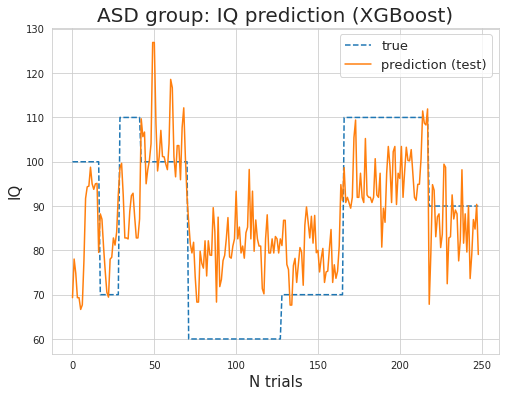

In [57]:
fig = plt.figure(figsize=(8,6))
plt.title('ASD group: IQ prediction (XGBoost)', fontsize=20)
plt.plot(np.arange(len(Y_test_a)), Y_test_a, label='true', linestyle='--')
plt.plot(np.arange(len(Y_test_a)), xgb_reg.predict(X_test_a), label='prediction (test)', linestyle='-')
plt.xlabel('N trials', fontsize=15)
plt.ylabel('IQ', fontsize=15)
plt.legend(fontsize=13)

##Control

In [449]:
X_train_c = train_all[train_all.Group==0].drop(columns=['IQ', 'Subject'])
Y_train_c = train_all[train_all.Group==0]['IQ']
X_test_c = test_all[test_all.Group==0].drop(columns=['IQ', 'Subject'])
Y_test_c = test_all[test_all.Group==0]['IQ']

ss = StandardScaler()
X_train_c = ss.fit_transform(X_train_c)
X_test_c = ss.fit_transform(X_test_c)

xgb_reg =  xgboost.XGBRegressor(n_estimators=2000,  
                     learning_rate=0.01, 
                     max_depth=2, 
                     random_state=42,
                     min_child_weight=8, # not exact analogue for min_samples_leaf
                     max_delta_step=0,
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     objective ='reg:squarederror') 

xgb_reg.fit(X_train_c, Y_train_c)

# Compute accuracy based on test samples
print("The model training score is" , xgb_reg.score(X_test_c, Y_test_c))

The model training score is 0.07062585321038006


In [450]:
score = []
#lr = [0.001, 0.01, 0.05, 0.1]

#'learning_rate':[0.001, 0.01, 0.05, 0.1],
#'n_estimators':[250, 500, 1000, 1500, 2000],
#'max_depth':[2,4,8,10],
#'min_child_weight': [3, 5, 7, 9],
#'max_delta_step':[0,5,10],
#'max_features':[3,6,9],
#'subsample':[0.6,0.8,1]}
ij = []

for i in [1000, 1500, 2000]:
  for j in [2, 4, 6]:
    ij.append([i,j])
    X_train_c = train_all[train_all.Group==0].drop(columns=['IQ', 'Subject'])
    Y_train_c = train_all[train_all.Group==0]['IQ']  
    X_test_c = test_all[test_all.Group==0].drop(columns=['IQ', 'Subject'])
    Y_test_c = test_all[test_all.Group==0]['IQ']

    ss = StandardScaler()
    X_train_c = ss.fit_transform(X_train_c)
    X_test_c = ss.fit_transform(X_test_c)

    xgb_reg =  xgboost.XGBRegressor(n_estimators=i,  
                     learning_rate=0.01, 
                     max_depth=j, 
                     random_state=42,
                     min_child_weight=9, # not exact analogue for min_samples_leaf
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     objective ='reg:squarederror') 
    xgb_reg.fit(X_train_c, Y_train_c)
    score.append(xgb_reg.score(X_test_c, Y_test_c))

In [451]:
ij[np.argmax(score)]

[2000, 2]

In [452]:
score = []
#lr = [0.001, 0.01, 0.05, 0.1]

#'learning_rate':[0.001, 0.01, 0.05, 0.1],
#'n_estimators':[250, 500, 1000, 1500, 2000],
#'max_depth':[2,4,8,10],
#'min_child_weight': [3, 5, 7, 9],
#'max_delta_step':[0,5,10],
#'max_features':[3,6,9],
#'subsample':[0.6,0.8,1]}
ij = []

for i in [3, 5, 7, 9]:
  for j in [0]:
    ij.append([i,j])
    X_train_c = train_all[train_all.Group==0].drop(columns=['IQ', 'Subject'])
    Y_train_c = train_all[train_all.Group==0]['IQ']  
    X_test_c = test_all[test_all.Group==0].drop(columns=['IQ', 'Subject'])
    Y_test_c = test_all[test_all.Group==0]['IQ']

    ss = StandardScaler()
    X_train_c = ss.fit_transform(X_train_c)
    X_test_c = ss.fit_transform(X_test_c)

    xgb_reg =  xgboost.XGBRegressor(n_estimators=2000,  
                     learning_rate=0.01, 
                     max_depth=2, 
                     random_state=42,
                     min_child_weight=i, # not exact analogue for min_samples_leaf
                     max_delta_step = j,
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     objective ='reg:squarederror') 
    xgb_reg.fit(X_train_c, Y_train_c)
    score.append(xgb_reg.score(X_test_c, Y_test_c))

In [453]:
ij[np.argmax(score)]

[7, 0]

In [454]:
score = []
#lr = [0.001, 0.01, 0.05, 0.1]

#'learning_rate':[0.001, 0.01, 0.05, 0.1],
#'n_estimators':[250, 500, 1000, 1500, 2000],
#'max_depth':[2,4,8,10],
#'min_child_weight': [3, 5, 7, 9],
#'max_delta_step':[0,5,10],
#'max_features':[3,6,9],
#'subsample':[0.6,0.8,1]}
ij = []

for i in [1,2,3]:
  for j in [1]:
    ij.append([i,j])
    X_train_c = train_all[train_all.Group==0].drop(columns=['IQ', 'Subject'])
    Y_train_c = train_all[train_all.Group==0]['IQ']  
    X_test_c = test_all[test_all.Group==0].drop(columns=['IQ', 'Subject'])
    Y_test_c = test_all[test_all.Group==0]['IQ']

    ss = StandardScaler()
    X_train_c = ss.fit_transform(X_train_c)
    X_test_c = ss.fit_transform(X_test_c)

    xgb_reg =  xgboost.XGBRegressor(n_estimators=2000,  
                     learning_rate=0.01, 
                     max_depth=2, 
                     random_state=42,
                     min_child_weight=7, # not exact analogue for min_samples_leaf
                     max_delta_step =0,
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     max_features = i,
                     subsample = j,
                     objective ='reg:squarederror') 
    xgb_reg.fit(X_train_c, Y_train_c)
    score.append(xgb_reg.score(X_test_c, Y_test_c))

In [455]:
ij[np.argmax(score)]

[1, 1]

In [456]:
xgb_reg =  xgboost.XGBRegressor(n_estimators=2000,  
                     learning_rate=0.01, 
                     max_depth=2, 
                     random_state=42,
                     min_child_weight=7, # not exact analogue for min_samples_leaf
                     max_delta_step =0,
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     max_features = 1,
                     subsample = 1,
                     objective ='reg:squarederror') 
xgb_reg.fit(X_train_c, Y_train_c)
xgb_reg.score(X_test_c, Y_test_c)

0.0924239259248959

In [457]:
xgb_reg.score(X_train_c, Y_train_c)

0.9394979866661117

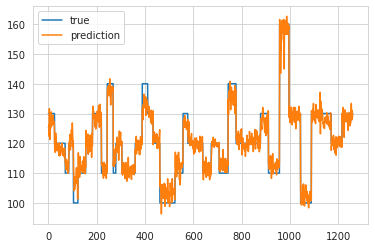

In [458]:
plt.plot(np.arange(len(Y_train_c)), Y_train_c, label='true')
plt.plot(np.arange(len(Y_train_c)), xgb_reg.predict(X_train_c), label='prediction')
plt.legend()

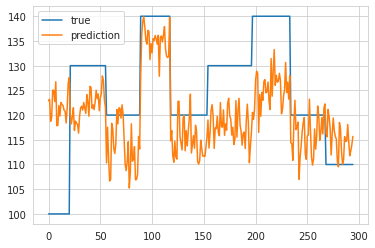

In [459]:
plt.plot(np.arange(len(Y_test_c)), Y_test_c, label='true')
plt.plot(np.arange(len(Y_test_c)), xgb_reg.predict(X_test_c), label='prediction')
plt.legend()

In [460]:
# Fits the explainer
explainer = shap.Explainer(xgb_reg.predict, X_test_c)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_c, max_evals=1345)

Permutation explainer: 296it [59:45, 12.16s/it]


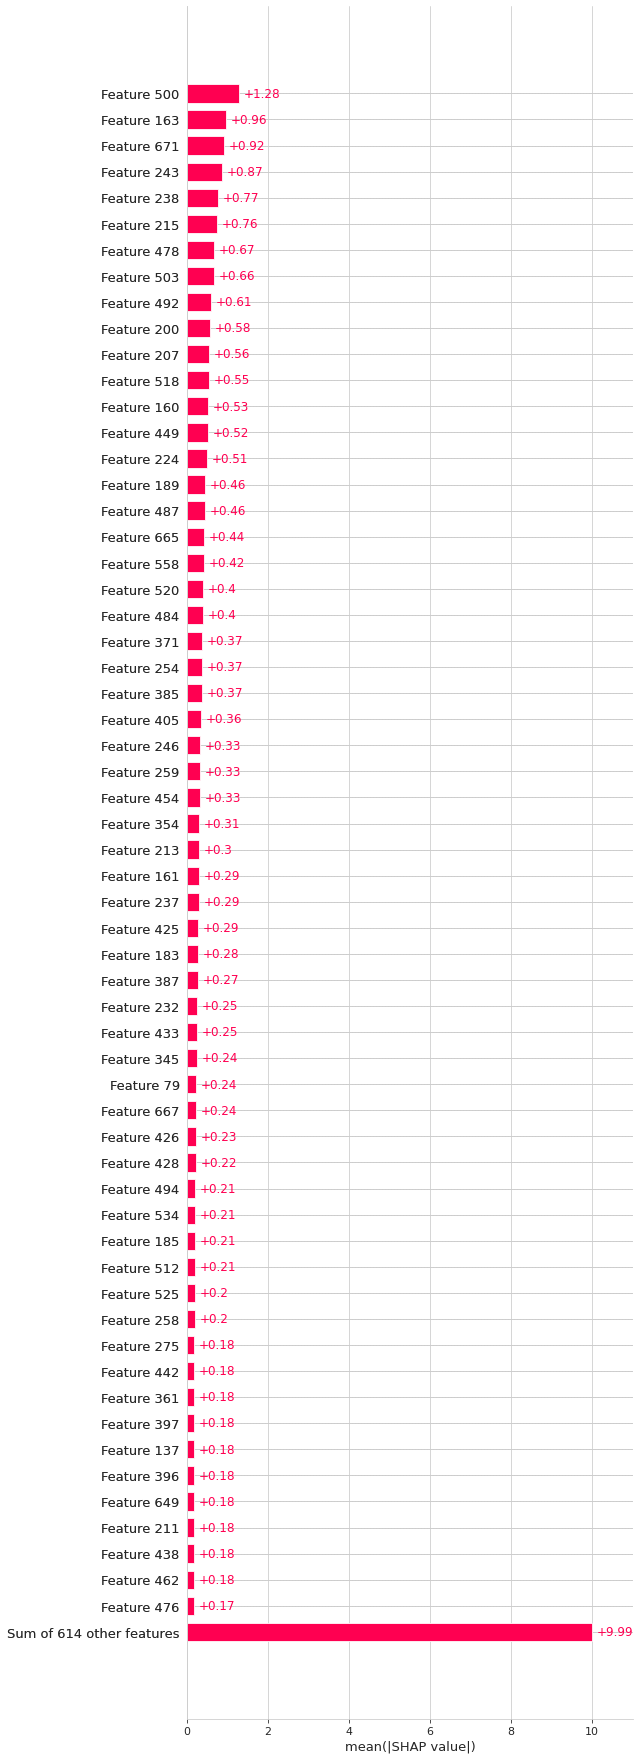

In [461]:
shap.plots.bar(shap_values, max_display=60)

In [462]:
vals = np.abs(shap_values.values).mean(0)
feature_names = train_all[train_all.Group==0].drop(columns=['IQ', 'Subject']).columns

feature_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                 columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],
                              ascending=False, inplace=True)
feature_importance.iloc[:50,:]

,col_name,feature_importance_vals
500,beta_2_40_superiortemporal-rh,1.284643
163,coef_2_40_superiorfrontal-rh,0.960747
671,Age,0.916642
243,offset_2_40_inferiortemporal-lh,0.873021
238,offset_2_40_cuneus-lh,0.774255
215,offset_2_40_lingual-rh,0.756539
478,beta_2_40_inferiortemporal-rh,0.669076
503,beta_2_40_bankssts-lh,0.662774
492,beta_2_40_postcentral-rh,0.606481
200,coef_2_40_temporalpole-lh,0.579233


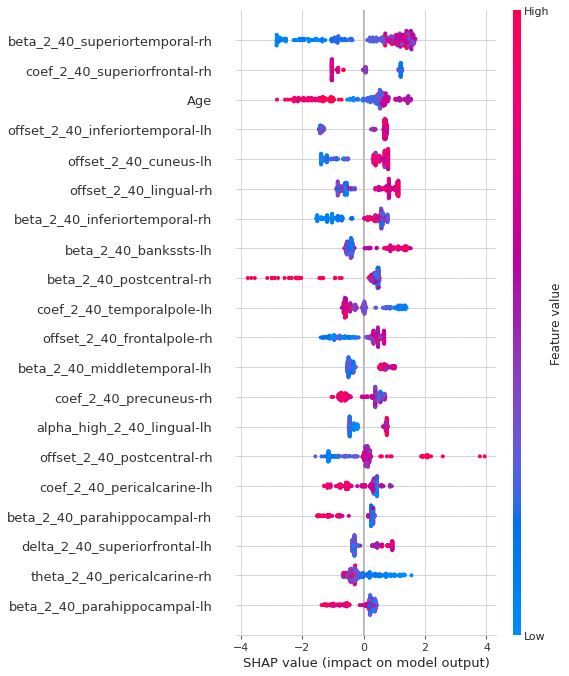

In [463]:
shap.summary_plot(shap_values, 
                  features=test_all[test_all.Group==0].drop(columns=['IQ', 'Subject']).values, 
                  feature_names=test_all[test_all.Group==0].drop(columns=['IQ', 'Subject']).columns)

In [464]:
test_all[test_all.Group==1].drop(columns=['IQ', 'Subject']).values.shape

(249, 673)

In [465]:
shap_values.shape

(295, 673)

In [466]:
train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]

,beta_2_40_parstriangularis-rh,Age,coef_2_40_precuneus-rh,coef_2_40_rostralmiddlefrontal-rh,coef_2_40_parsopercularis-rh,alpha_low_2_40_fusiform-rh,r2_2_40_superiorparietal-rh,beta_2_40_lateraloccipital-lh
1637,1.230352,15,1.149858,0.851146,1.074164,1.271460,0.968585,1.253606
1638,1.213326,15,1.167405,0.867067,1.032108,1.527609,0.988289,1.291844
1639,1.176759,15,1.229035,0.737459,0.946626,1.577585,0.984272,1.396675
1640,1.173845,15,1.290562,0.879232,1.072303,1.443885,0.978502,1.352554
1641,1.170989,15,1.258139,0.796305,0.960529,1.216365,0.988226,1.321127
...,...,...,...,...,...,...,...,...
2959,1.147081,14,1.263650,0.912385,1.201559,1.187377,0.993335,1.361427
2960,1.101459,14,1.288743,1.004132,1.266270,1.135461,0.992038,1.387220
2961,1.107424,14,1.336780,0.984147,1.281577,1.227946,0.989256,1.398467
2962,1.039633,14,1.347783,1.120008,1.338033,1.213683,0.990240,1.414018


In [467]:
n_feats = np.arange(1,30,1)
#scores_train = []
scores_test = []

for i in n_feats:
  goods = np.array(feature_importance.index[:i].tolist())

  X_train_c = train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
  Y_train_c = train_all[train_all.Group==1]['IQ']
  X_test_c = test_all[test_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods]
  Y_test_c = test_all[test_all.Group==1]['IQ']

  ss = StandardScaler()
  X_train_c = ss.fit_transform(X_train_c)
  X_test_c = ss.fit_transform(X_test_c)

  xgb_reg =  xgboost.XGBRegressor(n_estimators=2000,  
                     learning_rate=0.01, 
                     max_depth=2, 
                     random_state=42,
                     min_child_weight=7, # not exact analogue for min_samples_leaf
                     max_delta_step =0,
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     max_features = 1,
                     subsample = 1,
                     objective ='reg:squarederror') 
  xgb_reg.fit(X_train_c, Y_train_c)
  scores_test.append(xgb_reg.score(X_test_c, Y_test_c))

Text(0, 0.5, 'score')

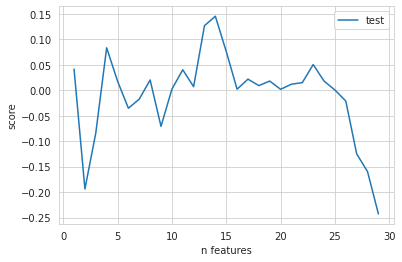

In [468]:
plt.plot(n_feats, scores_test, label='test')
plt.legend()
plt.xlabel('n features')
plt.ylabel('score')

In [469]:
goods = np.array(feature_importance.index[:20].tolist())

In [470]:
np.array(feature_importance.index[:20].tolist())

array([500, 163, 671, 243, 238, 215, 478, 503, 492, 200, 207, 518, 160,
       449, 224, 189, 487, 665, 558, 520])

In [471]:
goods = np.array([500, 163, 671, 243, 238, 215, 478, 503, 492, 200, 207, 518, 160, 449, 224, 189, 487, 665, 558, 520])
train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods].columns

Index(['beta_2_40_superiortemporal-rh', 'coef_2_40_superiorfrontal-rh', 'Age',
       'offset_2_40_inferiortemporal-lh', 'offset_2_40_cuneus-lh',
       'offset_2_40_lingual-rh', 'beta_2_40_inferiortemporal-rh',
       'beta_2_40_bankssts-lh', 'beta_2_40_postcentral-rh',
       'coef_2_40_temporalpole-lh', 'offset_2_40_frontalpole-rh',
       'beta_2_40_middletemporal-lh', 'coef_2_40_precuneus-rh',
       'alpha_high_2_40_lingual-lh', 'offset_2_40_postcentral-rh',
       'coef_2_40_pericalcarine-lh', 'beta_2_40_parahippocampal-rh',
       'delta_2_40_superiorfrontal-lh', 'theta_2_40_pericalcarine-rh',
       'beta_2_40_parahippocampal-lh'],
      dtype='object')

In [505]:
goods = np.array([500, 163, 671, 215, 478, 518, 224, 189, 558])

X_train_c = train_all[train_all.Group==0].drop(columns=['IQ', 'Subject']).iloc[:,goods]
Y_train_c = train_all[train_all.Group==0]['IQ']
X_test_c = test_all[test_all.Group==0].drop(columns=['IQ', 'Subject']).iloc[:,goods]
Y_test_c = test_all[test_all.Group==0]['IQ']

ss = StandardScaler()
X_train_c = ss.fit_transform(X_train_c)
X_test_c = ss.fit_transform(X_test_c)

xgb_reg =  xgboost.XGBRegressor(n_estimators=2000,  
                     learning_rate=0.01, 
                     max_depth=2, 
                     random_state=42,
                     min_child_weight=7, # not exact analogue for min_samples_leaf
                     max_delta_step =0,
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     max_features = 1,
                     subsample = 1,
                     objective ='reg:squarederror') 
xgb_reg.fit(X_train_c, Y_train_c)
xgb_reg.score(X_test_c, Y_test_c)

-0.02979430138746575

In [ ]:
goods = np.array([490, 671, 160, 162, 153, 342, 298, 514])#best
train_all[train_all.Group==1].drop(columns=['IQ', 'Subject']).iloc[:,goods].columns

Index(['beta_2_40_parstriangularis-rh', 'Age', 'coef_2_40_precuneus-rh',
       'coef_2_40_rostralmiddlefrontal-rh', 'coef_2_40_parsopercularis-rh',
       'alpha_low_2_40_fusiform-rh', 'r2_2_40_superiorparietal-rh',
       'beta_2_40_lateraloccipital-lh'],
      dtype='object')

In [ ]:
xgb_reg =  xgboost.XGBRegressor(n_estimators=1300,  
                     learning_rate=0.01, 
                     max_depth=1, 
                     random_state=42,
                     min_child_weight=1, # not exact analogue for min_samples_leaf
                     max_delta_step =0,
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     max_features = 1,
                     subsample = 1,
                     objective ='reg:squarederror') 

xgb_reg.fit(X_train_a, Y_train_a)
xgb_reg.score(X_train_a, Y_train_a)

0.505698892014766

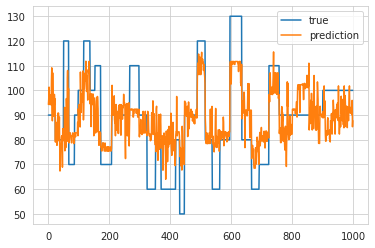

In [ ]:

plt.plot(np.arange(len(Y_train_a)), Y_train_a, label='true')
plt.plot(np.arange(len(Y_train_a)), xgb_reg.predict(X_train_a), label='prediction')
plt.legend()

In [ ]:
xgb_reg =  xgboost.XGBRegressor(n_estimators=1300,  
                     learning_rate=0.01, 
                     max_depth=1, 
                     random_state=42,
                     min_child_weight=1, # not exact analogue for min_samples_leaf
                     max_delta_step =0,
                     n_jobs=-1, # can be constructed in parrallel, much!!! faster) 
                     max_features = 1,
                     subsample = 1,
                     objective ='reg:squarederror') 

xgb_reg.fit(X_train_a, Y_train_a)
xgb_reg.score(X_test_a, Y_test_a)

0.3491194736677836

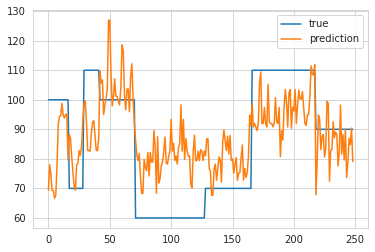

In [ ]:

plt.plot(np.arange(len(Y_test_a)), Y_test_a, label='true')
plt.plot(np.arange(len(Y_test_a)), xgb_reg.predict(X_test_a), label='prediction')
plt.legend()

In [265]:
svc_model = GridSearchCV(xgboost.XGBRegressor(),                      
                         {'learning_rate':[0.001, 0.01, 0.05, 0.1],
                          'n_estimators':[250, 500, 1000, 1500, 2000],
                          'max_depth':[2,4,8,10],
                          'min_child_weight': [3, 5, 7, 9],
                          'max_delta_step':[0,5,10],
                          'max_features':[3,6,9],
                          'subsample':[0.6,0.8,1]}
                          ).fit(X_train_a, Y_train_a)

[09:32:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:32:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:32:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:32:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:32:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:32:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:32:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:32:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

KeyboardInterrupt: ignored